# Scikit-Learn overview

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns

## クラス分類 (Classification)

与えられた膨大なデータを，あらかじめ人間が割り当てたカテゴリ（クラス）に割り当てるタスク．

ここではSVM（サポートベクターマシン）のデモを行います．

擬似乱数のSEEDを設定

In [2]:
SEED = 42

np.random.seed(SEED)

データの読み込み

In [3]:
df1 = load_iris(as_frame=True)["frame"]

print("---"*10,"raw data","---"*30)
display(df1.head(10))
print("---"*10,"info","---"*30)
print(df1.info())
print("---"*10,"describe","---"*30)
print(df1.describe())

------------------------------ raw data ------------------------------------------------------------------------------------------


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


------------------------------ info ------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
------------------------------ describe ------------------------------------------------------------------------------------------
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866          

データを訓練用とテスト用に分ける

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df1.iloc[:,:4], df1["target"],
    stratify=df1["target"],
    test_size=0.3,
    shuffle=True,
    )

サポートベクターマシンの初期化と訓練

In [5]:
classifier = SVC()
classifier.fit(X_train,y_train)

SVC()

テストデータに対する予測結果の表示

In [6]:
predicted_class_label = classifier.predict(X_test)
predicted_class_label

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       1])

結果の可視化

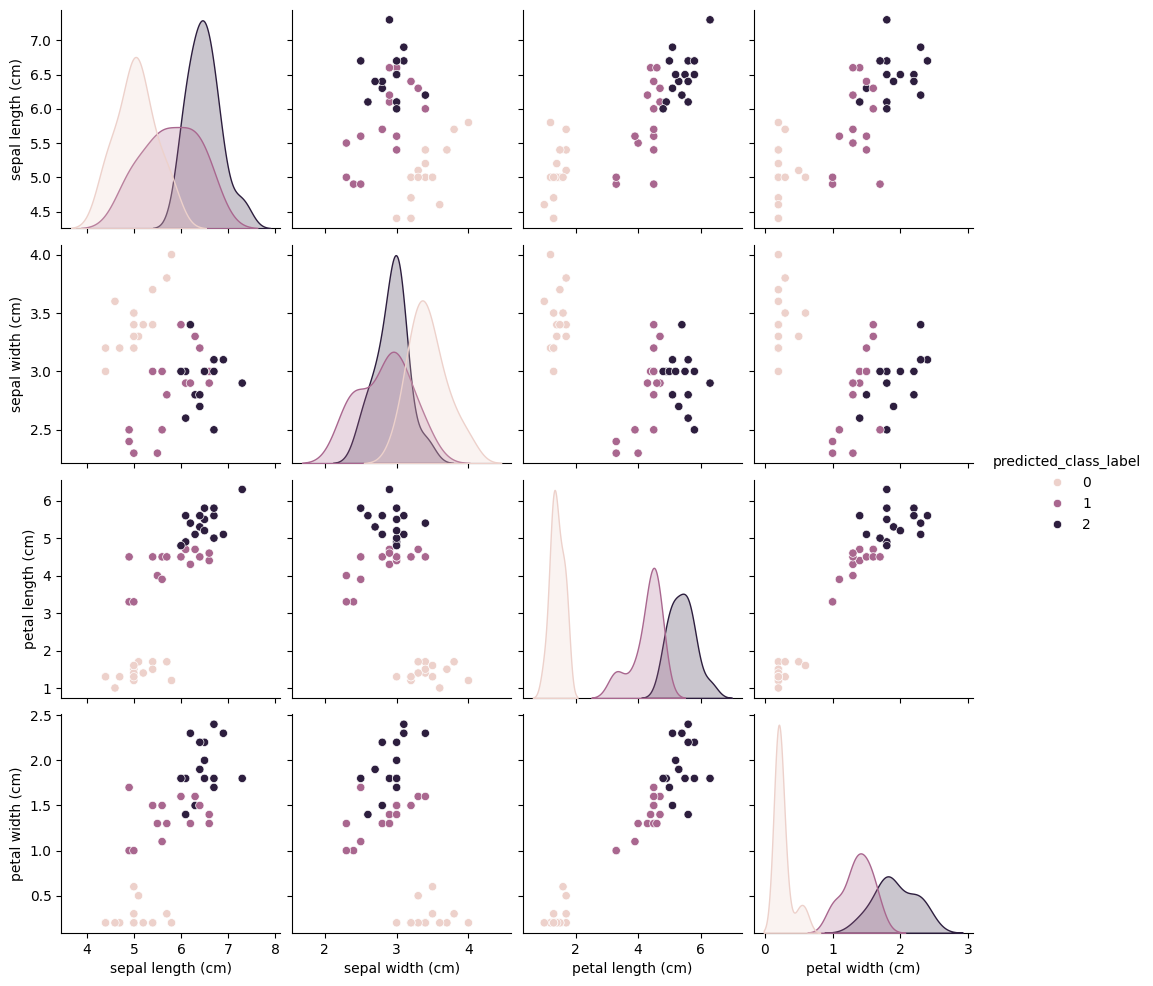

In [7]:
results1 = X_test.copy()
results1["predicted_class_label"] = predicted_class_label
sns.pairplot(results1, hue="predicted_class_label")

In [8]:
results1["true_class_label"] = y_test
results1.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predicted_class_label,true_class_label
107,7.3,2.9,6.3,1.8,2,2
63,6.1,2.9,4.7,1.4,1,1
133,6.3,2.8,5.1,1.5,2,2
56,6.3,3.3,4.7,1.6,1,1
127,6.1,3.0,4.9,1.8,2,2
140,6.7,3.1,5.6,2.4,2,2
53,5.5,2.3,4.0,1.3,1,1
69,5.6,2.5,3.9,1.1,1,1
20,5.4,3.4,1.7,0.2,0,0
141,6.9,3.1,5.1,2.3,2,2


In [9]:
classifier.score(X_test,y_test)

0.9555555555555556

## 回帰 (Regression)

与えられた膨大なデータから，それらに対応する数値を予測するタスク．

ここではランダムフォレストを使ったデモを行います．

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes

In [11]:
df2 = load_diabetes(as_frame=True)["frame"]
print("---"*10,"raw data","---"*30)
display(df2.head(10))
print("---"*10,"info","---"*30)
print(df2.info())
print("---"*10,"describe","---"*30)
print(df2.describe())

------------------------------ raw data ------------------------------------------------------------------------------------------


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


------------------------------ info ------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None
------------------------------ describe ------------------------------------------------------------------------------------------
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e

In [12]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(
    df2.iloc[:,:-1], df2["target"],
    test_size=0.3,
    shuffle=True,
    )

In [13]:
regressor = RandomForestRegressor()
regressor.fit(X_train2,y_train2)

RandomForestRegressor()

予測結果

In [14]:
predicted_value = regressor.predict(X_test2)
predicted_value

array([130.75,  89.33, 148.52, 168.82,  90.81, 173.92, 115.08,  97.47,
       249.04, 253.01, 171.58, 104.28, 184.22,  93.06, 112.24, 279.37,
       109.33, 121.46,  94.48, 188.71, 106.02, 219.32,  98.57, 128.64,
       253.92, 188.17, 148.01, 226.34,  87.36,  98.86, 165.6 , 199.5 ,
       111.83, 138.82, 167.41,  98.5 , 103.2 , 107.83, 149.75, 283.  ,
       247.3 , 225.36, 186.03, 198.68, 188.52, 175.25, 144.57,  85.44,
       107.83,  89.09, 215.06, 175.73, 194.03, 190.17,  90.92,  73.63,
       148.88,  86.92,  84.84, 108.3 ,  92.55, 108.25, 156.03, 165.02,
       240.1 , 224.75, 123.68, 225.14, 103.08, 107.86, 189.89, 269.44,
       127.77, 100.59, 240.83, 151.35,  93.61, 175.42, 225.9 ,  98.64,
       169.71, 195.16, 112.2 , 102.33,  73.17, 198.85, 109.89, 202.56,
       187.47, 197.38, 150.23,  69.78, 155.9 , 227.56, 131.47, 168.91,
       183.24, 177.13, 132.77, 161.82,  93.27, 246.47, 182.01,  92.69,
       153.69, 148.82, 157.84, 144.17, 154.28,  96.33, 215.61, 226.44,
      

結果の可視化

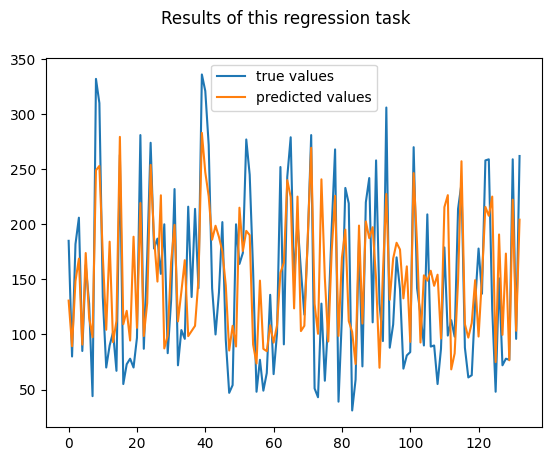

In [23]:
fig = plt.figure()
fig.suptitle("Results of this regression task")
ax = fig.add_subplot(111)
ax.plot(np.arange(len(y_test2)),y_test2,label="true values")
ax.plot(np.arange(len(y_test2)),predicted_value, label="predicted values")
ax.legend()
plt.show()

In [15]:
results2 = X_test2.copy()
results2["predicted_value"] = predicted_value
results2["true_value"] = y_test2
results2.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,predicted_value,true_value
183,0.045341,0.050680,-0.035307,0.063187,-0.004321,-0.001627,-0.010266,-0.002592,0.015568,0.056912,130.75,185.0
288,0.070769,0.050680,-0.016984,0.021872,0.043837,0.056305,0.037595,-0.002592,-0.070209,-0.017646,89.33,80.0
54,-0.049105,-0.044642,0.025051,0.008101,0.020446,0.017788,0.052322,-0.039493,-0.041176,0.007207,148.52,182.0
365,0.034443,-0.044642,-0.038540,-0.012556,0.009439,0.005262,-0.006584,-0.002592,0.031193,0.098333,168.82,206.0
136,-0.092695,-0.044642,-0.081653,-0.057313,-0.060735,-0.068014,0.048640,-0.076395,-0.066490,-0.021788,90.81,85.0
65,-0.045472,0.050680,-0.024529,0.059744,0.005311,0.014970,-0.054446,0.071210,0.042341,0.015491,173.92,163.0
63,-0.034575,-0.044642,-0.037463,-0.060756,0.020446,0.043466,-0.013948,-0.002592,-0.030748,-0.071494,115.08,128.0
306,0.009016,0.050680,-0.001895,0.021872,-0.038720,-0.024800,-0.006584,-0.039493,-0.039809,-0.013504,97.47,44.0
290,0.059871,0.050680,0.076786,0.025315,0.001183,0.016849,-0.054446,0.034309,0.029935,0.044485,249.04,332.0
254,0.030811,0.050680,0.056307,0.076958,0.049341,-0.012274,-0.036038,0.071210,0.120051,0.090049,253.01,310.0


In [16]:
regressor.score(X_test2,y_test2)

0.47975011322424

## クラスタリング (Clustering)

与えられた膨大なデータをいくつかのグループに分けるタスク．ここで見つかったグループをクラスターと呼ぶ．

ここではkmeansを使ってデモを行います．

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clustering = KMeans(n_clusters=2, n_init="auto")
clustering.fit(X_train)

KMeans(n_clusters=2, n_init='auto')

In [ ]:
clustering.transform(X_train)[:10]

array([[2.42265007, 1.92048332],
       [0.8523378 , 3.64172282],
       [4.03925862, 0.41690734],
       [1.25135927, 5.15481766],
       [1.1437106 , 2.92431009],
       [0.75495562, 4.55075458],
       [4.07961902, 0.35501261],
       [3.9903091 , 0.42548085],
       [4.32085791, 0.78770451],
       [1.28253091, 5.2050649 ]])

In [ ]:
clustering.predict(X_train)

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

In [ ]:
clustering.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0], dtype=int32)

In [ ]:
results1.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'predicted_class_label', 'true_class_label'],
      dtype='object')

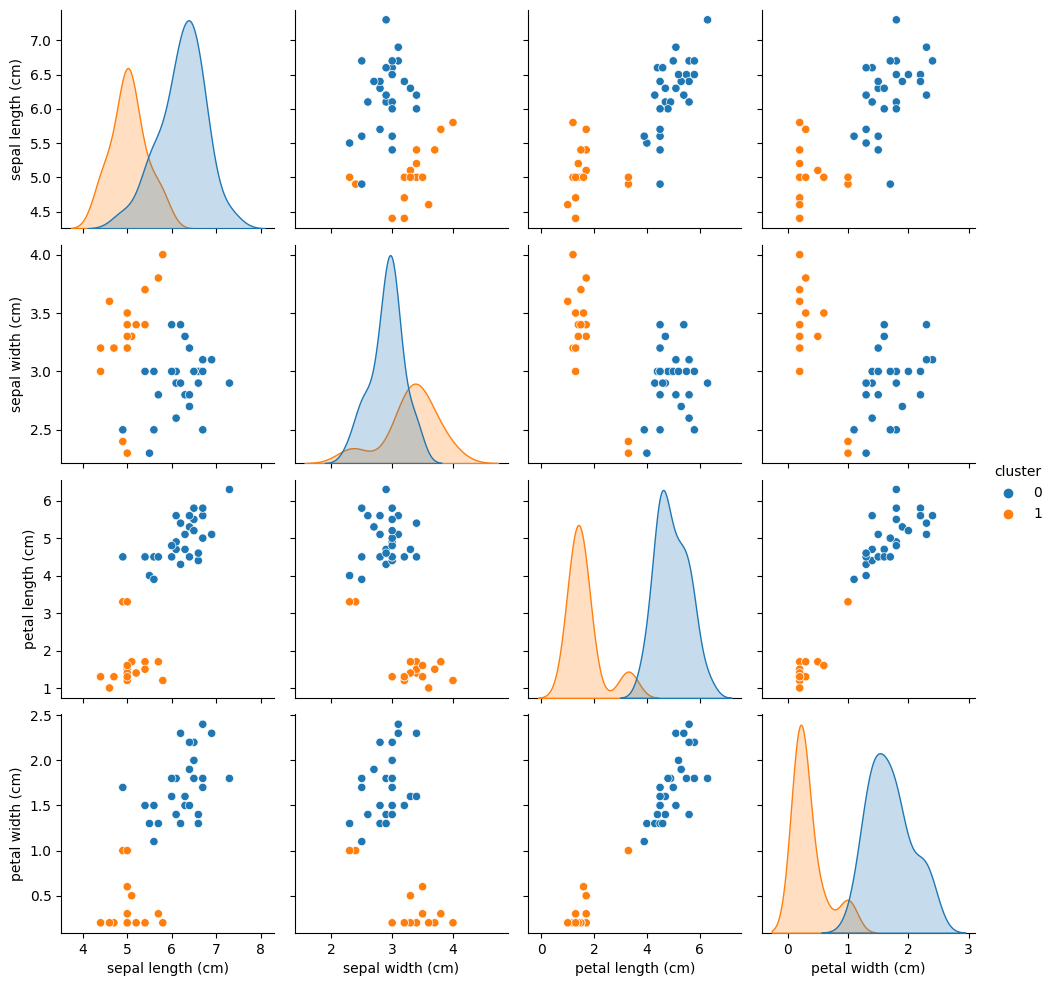

In [ ]:
results1["cluster"] = clustering.predict(X_test)
sns.pairplot(
    results1[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)', "cluster"]],
    hue="cluster",
    )

In [ ]:
results1.head(10)[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'true_class_label',
       'cluster']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),true_class_label,cluster
107,7.3,2.9,6.3,1.8,2,0
63,6.1,2.9,4.7,1.4,1,0
133,6.3,2.8,5.1,1.5,2,0
56,6.3,3.3,4.7,1.6,1,0
127,6.1,3.0,4.9,1.8,2,0
140,6.7,3.1,5.6,2.4,2,0
53,5.5,2.3,4.0,1.3,1,0
69,5.6,2.5,3.9,1.1,1,0
20,5.4,3.4,1.7,0.2,0,1
141,6.9,3.1,5.1,2.3,2,0


## 次元削減

多次元データの情報をできるだけ欠損させずに，より低次元で表現するタスク．

ここではLSI（Latent Semantic Indexing）でデモを行います．

In [ ]:
from sklearn.decomposition import TruncatedSVD as LSI
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
news = fetch_20newsgroups()
vectorizer = TfidfVectorizer(max_features=2000, stop_words="english")
vectorizer.fit(news.data)

TfidfVectorizer(max_features=2000, stop_words='english')

In [ ]:
X = vectorizer.transform(news.data)

In [ ]:
decomposer = LSI(n_components=2,)
decomposer.fit(X)

TruncatedSVD()

In [ ]:
embed = decomposer.transform(X)

In [ ]:
news_df = pd.DataFrame(embed)
news_df["class"] = news.target
news_df.head()

,0,1,class
0,0.187086,-0.044993,7
1,0.130343,-0.079725,4
2,0.262456,-0.021949,4
3,0.254814,-0.056914,1
4,0.210019,-0.006331,14


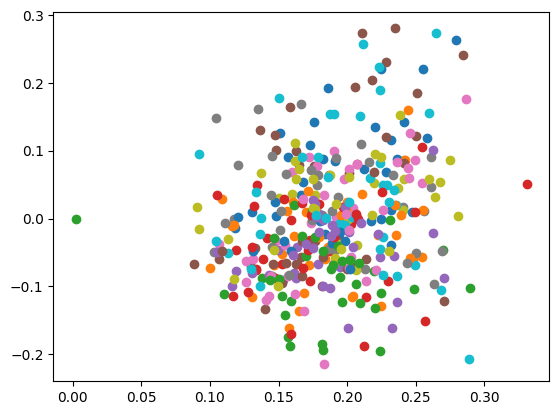

In [ ]:
for i in range(0,20):
    x = embed[:,0][news.target==i]
    y = embed[:,1][news.target==i]
    plt.scatter(x[:20], y[:20])